# Tunning Ann

In [1]:
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

_X = pd.read_csv('../data/xtrain.csv')
y = pd.read_csv('../data/ytrain.csv')

scaler = StandardScaler()
scaler.fit(_X)
X = scaler.transform(_X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

X_control = pd.read_csv('../data/xtest.csv')
X_control = scaler.transform(X_control)
y_control = pd.read_csv('../data/ytest.csv')

In [4]:
# Dimensionality test

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

models = {
    'Ann-P1': MLPRegressor(),
    'Ann-P2': make_pipeline(PolynomialFeatures(2), MLPRegressor()),
    'Ann-P3': make_pipeline(PolynomialFeatures(3), MLPRegressor()),
}


for name,ann in models.items():
    ann.fit(X_train, y_train)
    train_pred = ann.predict(X_train)
    test_pred = ann.predict(X_test)

    print('='*100)
    print(name)
    print('Train -- R2 =', r2_score(y_train, train_pred))
    print('Test -- R2 =', r2_score(y_test, test_pred))
    print('='*100)

Ann-P1
Train -- R2 = 0.9208554422492918
Test -- R2 = 0.9221383310265086
Ann-P2
Train -- R2 = 0.9233536906156552
Test -- R2 = 0.923854864343838
Ann-P3
Train -- R2 = 0.9269816586730949
Test -- R2 = 0.9257620415851165


El desempeño de los modelos es prácticamente similar, de manera que para aumentar el desempeño pero mantener su rapidez, se dejará en 1.

In [5]:
from sklearn.metrics import r2_score

def get_r2(model, train=True):

    model.fit(X_train, y_train)
    if train:
        train_pred = model.predict(X_train)
        return r2_score(y_train, train_pred)
    else:
        test_pred = model.predict(X_test)   
        return r2_score(y_test, test_pred)


def create_plot(name, iterator, train, test):

    plt.plot(iterator, train_results, '#ff9900', label='Train R2')
    plt.plot(iterator, test_results, '#ffc1de', label='Test R2')
    plt.title(f'R2 vs {name}')
    plt.legend()
    plt.ylabel('$R^2$')
    plt.xlabel(f'{name}')
    plt.show()


def create_table(name, iterator, train, test):

    results = pd.DataFrame()
    results[name] = iterator
    results['TrainScore'] = train_results
    results['TestScore'] = test_results
    return results

In [6]:
from sklearn.neural_network import MLPRegressor

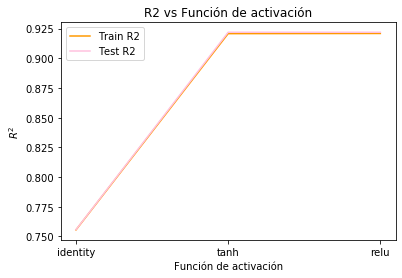

In [9]:
# Find best activation function

activation = ['identity', 'tanh', 'relu']
name = 'Función de activación'
iterator = activation

# Get scores and plot
train_results = []
test_results = []
for value in iterator:
    model = MLPRegressor(activation=value)
    train_results.append(get_r2(model))
    test_results.append(get_r2(model, train=False))


result_id = create_table(name, iterator, train_results, test_results)
create_plot(name, iterator, train_results, test_results)

In [10]:
result_id

,Función de activación,TrainScore,TestScore
0,identity,0.755524,0.755716
1,tanh,0.920755,0.921938
2,relu,0.920897,0.921923


Aunque mínimos, se tiene un mejor resultado con la función tanh

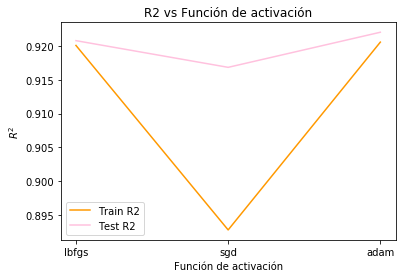

In [11]:
# Find best solver

solver = ['lbfgs', 'sgd', 'adam']
name = 'Función de activación'
iterator = solver

# Get scores and plot
train_results = []
test_results = []
for value in iterator:
    model = MLPRegressor(solver=value)
    train_results.append(get_r2(model))
    test_results.append(get_r2(model, train=False))


result_so = create_table(name, iterator, train_results, test_results)
create_plot(name, iterator, train_results, test_results)

In [12]:
result_so

,Función de activación,TrainScore,TestScore
0,lbfgs,0.920106,0.920816
1,sgd,0.892771,0.916861
2,adam,0.920596,0.922062


El mejor sover es adam

In [ ]:
# Learning rate actualization

hidden_layer_sizes = [(250,), (100,), (50,), (100,200,100)]
name = 'Actualización de pesos'
iterator = hidden_layer_sizes

# Get scores and plot
train_results = []
test_results = []
for value in iterator:
    model = MLPRegressor(hidden_layer_sizes=value)
    train_results.append(get_r2(model))
    test_results.append(get_r2(model, train=False))


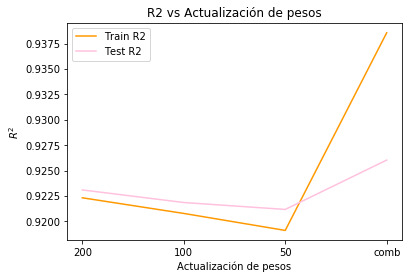

In [17]:
label = ['200', '100', '50', 'comb']
result_hl = create_table(name, label, train_results, test_results)
create_plot(name, label, train_results, test_results)

In [18]:
result_hl

,Actualización de pesos,TrainScore,TestScore
0,200,0.922317,0.923092
1,100,0.920775,0.921851
2,50,0.919102,0.921170
3,comb,0.938581,0.926035


A mayor número de neuronas, también aumenta el score, aunque no de manera significativa. En el caso de una red profunda el score se mejora, pero empieza a incurrir en overfitting

In [19]:
# Score function

def croos_score(model, X, y):
    """Print score."""
    from sklearn.model_selection import cross_val_score

    score = cross_val_score(model, X, y, scoring='r2')
    
    print('='*100)
    print('-- R2 =', score.mean())
    print('='*100)

In [23]:
# Experimento 1
# heran 9... 
arch1 = (10,100, 100, 50, 10,)
ann1 = MLPRegressor(hidden_layer_sizes=arch1)
croos_score(ann1, X, y)

-- R2 = 0.9242903256079004


In [24]:
# Experimento 2

arch2 = (1000,)
ann2 = MLPRegressor(hidden_layer_sizes=arch2)
croos_score(ann2, X, y)

-- R2 = 0.9235304769012288


Para el caso de este desarrollo, el cambio en la arquitectura de la red, no representa un cambio significativo en el performance del model

## Tunning ann

In [ ]:
# Load data

from sklearn.preprocessing import StandardScaler

X = pd.read_csv('../data/xtrain.csv')
y = pd.read_csv('../data/ytrain.csv')

scaler = StandardScaler()
scaler.fit(_X)
X = scaler.transform(X)

X_control = pd.read_csv('../data/xtest.csv')
X_control = scaler.transform(X_control)
y_control = pd.read_csv('../data/ytest.csv')

In [ ]:
# Grid search

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

model = MLPRegressor(activation='tanh')
params = {
    'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
    'learning_rate_init': [0.01, 0.001, 0.0001],
    'beta_1': [0.9, 0.7, 0.5]
    'beta_2': [0.999, 0.9, 0.8],
}

gscv = GridSearchCV(
    estimator=model,
    param_grid=params,
    scoring='r2',
    n_jobs=2
)

In [38]:
gscv.fit(X, y)

array([1.000000e-07, 2.000008e-02, 4.000006e-02, 6.000004e-02,
       8.000002e-02, 1.000000e-01])

In [ ]:
# Results
print('='*100)
print('Best Score:', gscv.best_score_)
print('Best params:', gscv.best_params_)
print('\nBest estimator', gscv.best_estimator_)
print('='*100)

In [ ]:
from sklearn.metrics import r2_score

BestAnn = MLPRegressor(
)

BestAnn.fit(X,y)

prediction = BestAnn.predict(X)
score = r2_score(y, prediction)

control_prediction = BestAnn.predict(X_control)
control_score = r2_score(y_control, control_prediction)

print('='*100, '\nTrain data')
print('R2 = ', score)
print('='*100)

print('='*100, '\nControl data')
print('R2 = ', control_score)
print('='*100)

In [ ]:
from sklearn.metrics import (
    mean_squared_error,
    explained_variance_score,
    max_error,
    mean_absolute_error,
    median_absolute_error,
    mean_squared_log_error
) 

prediction[prediction < 0] = 0
control_prediction[control_prediction < 0] = 0

scores = {
    'MSE': mean_squared_error,
    'EVS': explained_variance_score,
    'ME': max_error,
    'MAE': mean_absolute_error,
    'MeAE': median_absolute_error,
    'MSLE': mean_squared_log_error,
    'R2': r2_score
}

for name, score in scores.items():
    print('='*100)
    print('---', name, '---')
    print('Train data')
    print('R2 = ', score(y, prediction))
    print('Control data')
    print('R2 = ', score(y_control, control_prediction))
    print('='*100)